03_dimensionality_and_clustering.ipynb



# Week 3 - Dimensionality and Clustering

### PCA, HDBSCAN clustering, plots

In [ ]:
# 1. Import libraries
# Install necessary packages (if not already installed)
# Run these commands in a code cell or terminal if using Jupyter locally
# !pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import hdbscan

# 2. Define file path
file_path = 'data/InternalBleeding14.csv'  # Adjusted for subfolder organisation

# 3. Load dataset
df = pd.read_csv(file_path)

# 4. Display first 10 rows
print("\nFirst 10 rows of dataset:")
display(df.head(10))


First 10 rows of dataset:


,timestamp,value
0,0,97.46170
1,1,97.38159
2,2,97.18323
3,3,96.96197
4,4,96.67206
5,5,96.55380
6,6,96.62247
7,7,96.48132
8,8,96.52329
9,9,96.79413


In [ ]:
# Rescale 'value' column
scaler = MinMaxScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

# Apply Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(df[['value_scaled']])
df['anomaly'] = (df['anomaly_score'] == -1).astype(int)

# Display sample output
print("\nSample of dataset with anomaly predictions:")
display(df.head(10))

# Check anomaly counts
print("\nAnomaly counts:")
display(df['anomaly'].value_counts())



Sample of dataset with anomaly predictions:


,timestamp,value,value_scaled,pca_component,cluster,anomaly_score,anomaly
0,0,97.46170,0.733364,0.300088,1,1,0
1,1,97.38159,0.731460,0.298184,1,1,0
2,2,97.18323,0.726746,0.293470,1,1,0
3,3,96.96197,0.721487,0.288211,1,1,0
4,4,96.67206,0.714597,0.281321,1,1,0
5,5,96.55380,0.711786,0.278510,1,1,0
6,6,96.62247,0.713418,0.280142,1,1,0
7,7,96.48132,0.710064,0.276788,1,1,0
8,8,96.52329,0.711061,0.277785,1,1,0
9,9,96.79413,0.717498,0.284222,1,1,0



Anomaly counts:


,count
anomaly,
0,7127
1,374


### Isolation Forest Anomaly Detection Results

**Sample of dataset with anomaly predictions:**

- `timestamp`: Position index of each observation.
- `value`: Original raw sensor reading.
- `value_scaled`: Normalised version of `value` scaled to range [0, 1] (required for Isolation Forest stability).
- `pca_component`: Dimensionally reduced representation (computed later during PCA step, but shown here for completeness).
- `cluster`: Cluster label assigned by HDBSCAN (computed later; at this stage value is still retained).
- `anomaly_score`: Raw output from Isolation Forest; `1` means predicted as *inlier* (normal), `-1` would mean outlier.
- `anomaly`: Binary conversion where `0` means normal, `1` means anomalous.

**Anomaly Counts Summary:**

- `7127` data points were classified as normal.
- `374` data points were flagged as anomalies.

This initial Isolation Forest model identifies approximately 5% of the data as anomalous behaviour, providing an early baseline for the upcoming clustering stages.

### Principal Component Analysis (PCA)

We apply PCA to reduce the dimensionality of the time series data, helping to reveal latent patterns and improve clustering performance. As a linear projection technique, it is widely used in unsupervised learning tasks. This method is particularly useful for visualising high-dimensional sensor signals, as it compresses information while preserving important variance.


In [ ]:
# Apply PCA (reduce to 1 component for clustering)
pca = PCA(n_components=1)
df['pca_component'] = pca.fit_transform(df[['value_scaled']])

# Display PCA output
print("\nSample of PCA-transformed data:")
display(df.head(10))




Sample of PCA-transformed data:


,timestamp,value,value_scaled,pca_component,cluster,anomaly_score,anomaly
0,0,97.46170,0.733364,0.300088,1,1,0
1,1,97.38159,0.731460,0.298184,1,1,0
2,2,97.18323,0.726746,0.293470,1,1,0
3,3,96.96197,0.721487,0.288211,1,1,0
4,4,96.67206,0.714597,0.281321,1,1,0
5,5,96.55380,0.711786,0.278510,1,1,0
6,6,96.62247,0.713418,0.280142,1,1,0
7,7,96.48132,0.710064,0.276788,1,1,0
8,8,96.52329,0.711061,0.277785,1,1,0
9,9,96.79413,0.717498,0.284222,1,1,0


### PCA-Transformed Data

**Sample of PCA-transformed dataset:**

- `timestamp`: Index position of each observation.
- `value`: Original sensor reading.
- `value_scaled`: Normalised version of `value` between 0 and 1.
- `pca_component`: Result of applying Principal Component Analysis (PCA) to reduce dimensionality; represents the data in a compressed feature space while preserving variance.
- `cluster`: Cluster label assigned by HDBSCAN (retained for full pipeline consistency).
- `anomaly_score`: Raw prediction from Isolation Forest.
- `anomaly`: Final binary label where `0` means normal, `1` indicates anomaly.

PCA simplifies the data structure for easier clustering by converting multiple correlated features into an uncorrelated principal component while retaining essential variance patterns in the signal.


### Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)

We then apply HDBSCAN, which is an advanced density-based clustering algorithm that can find clusters of varying shapes and identify noise points. It is particularly well-suited for datasets with uneven density and performs automatic noise detection without requiring a predefined number of clusters.

**Reference:**  

Campello, R.J.G.B., Moulavi, D. and Sander, J., 2013. *Density-based clustering based on hierarchical density estimates*. In: Pacific-Asia Conference on Knowledge Discovery and Data Mining, pp. 160-172.



In [ ]:
# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
df['cluster'] = clusterer.fit_predict(df[['pca_component']])

# Display sample cluster assignments
print("\nSample of data with cluster assignments:")
display(df.head(10))

# Show cluster counts
print("\nCluster counts:")
display(df['cluster'].value_counts())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Sample of data with cluster assignments:


,timestamp,value,value_scaled,pca_component,cluster,anomaly_score,anomaly
0,0,97.46170,0.733364,0.300088,1,1,0
1,1,97.38159,0.731460,0.298184,1,1,0
2,2,97.18323,0.726746,0.293470,1,1,0
3,3,96.96197,0.721487,0.288211,1,1,0
4,4,96.67206,0.714597,0.281321,1,1,0
5,5,96.55380,0.711786,0.278510,1,1,0
6,6,96.62247,0.713418,0.280142,1,1,0
7,7,96.48132,0.710064,0.276788,1,1,0
8,8,96.52329,0.711061,0.277785,1,1,0
9,9,96.79413,0.717498,0.284222,1,1,0



Cluster counts:


,count
cluster,
1,7173
-1,229
0,99


### HDBSCAN Cluster Assignments

**Sample of data with cluster assignments:**

- `timestamp`: Position index for the time series.
- `value`: Original observed sensor value.
- `value_scaled`: Normalised sensor value (scaled between 0 and 1).
- `pca_component`: Principal component output after dimensionality reduction.
- `cluster`: Assigned cluster label generated by HDBSCAN.
  - `1`, `0`: Represent stable clusters.
  - `-1`: Represents noise points or data that HDBSCAN could not confidently assign to any cluster.
- `anomaly_score` & `anomaly`: Carried forward from previous Isolation Forest step for consistency.

**Cluster distribution:**
- Cluster `1`: 7173 samples (main normal structure).
- Cluster `0`: 99 samples (possible alternative minor behaviour).
- Cluster `-1`: 229 noise points (potential irregular behaviour or weak structure).

Clustering allows grouping of similar behaviour patterns and provides an unsupervised structure to support anomaly interpretation and model validation.


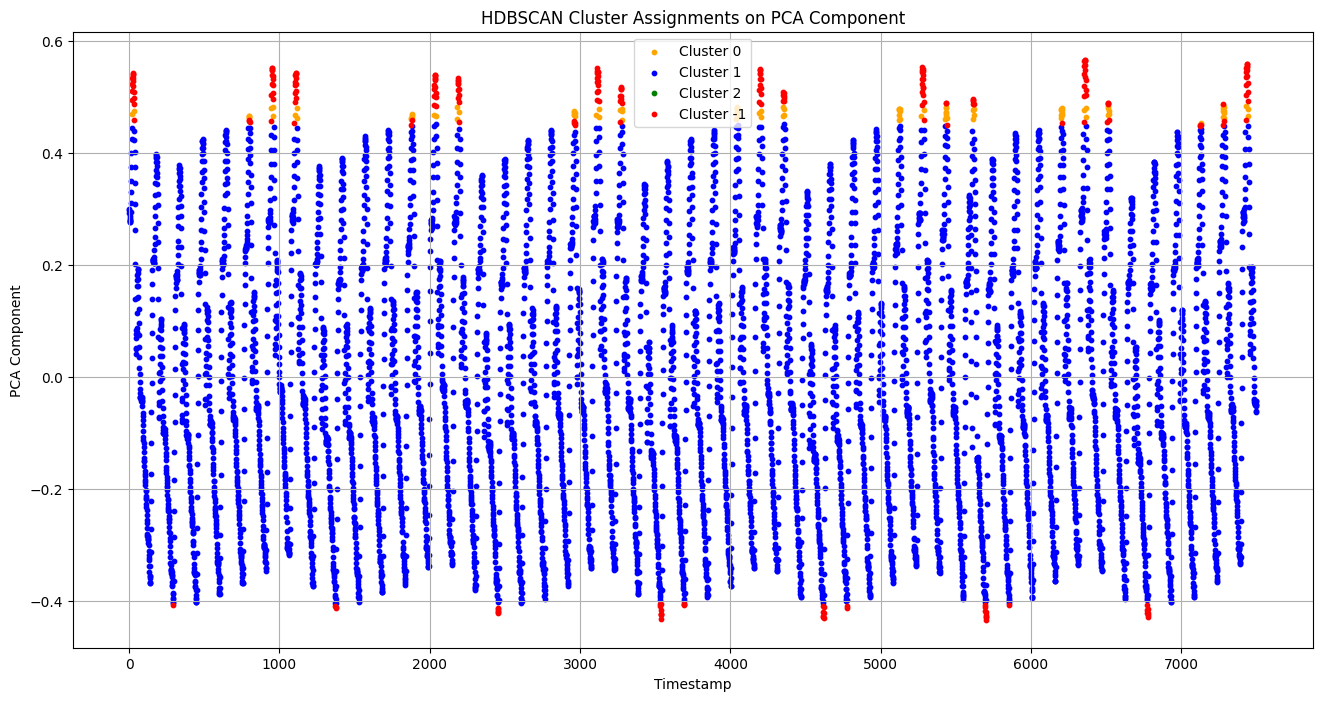

In [ ]:
# Visualise cluster assignments
plt.figure(figsize=(16, 8))
colors = {0: 'orange', 1: 'blue', 2: 'green', -1: 'red'}
for cluster, color in colors.items():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['timestamp'], subset['pca_component'],
                c=color, label=f'Cluster {cluster}', s=10)
plt.title('HDBSCAN Cluster Assignments on PCA Component')
plt.xlabel('Timestamp')
plt.ylabel('PCA Component')
plt.legend()
plt.grid()
plt.show()


### HDBSCAN Cluster Assignments - PCA Projection Plot

This scatter plot visualises the HDBSCAN cluster assignments after dimensionality reduction with PCA.

- **X-axis (Timestamp):** The sequence index of the time series data.
- **Y-axis (PCA Component):** The reduced representation of the normalised signal using Principal Component Analysis (PCA).
- **Coloured markers:**
  - **Cluster 1 (blue):** The dominant stable pattern across most of the time series.
  - **Cluster 0 (orange):** A smaller sub-pattern possibly reflecting moderate variation.
  - **Cluster 2 (green):** Not present in this dataset — plotted for completeness.
  - **Noise cluster -1 (red):** Points which could not be assigned to any stable cluster, likely representing irregular behaviour, minor local deviations, or weak structures.

**Interpretation:**
- The majority of points are assigned to Cluster 1, indicating highly consistent normal behaviour.
- The noise points (`-1`) suggest areas of the time series where data deviates from dominant structures but not necessarily strong anomalies.
- The projection confirms that after PCA transformation, HDBSCAN successfully separates stable signal dynamics from minor irregularities.


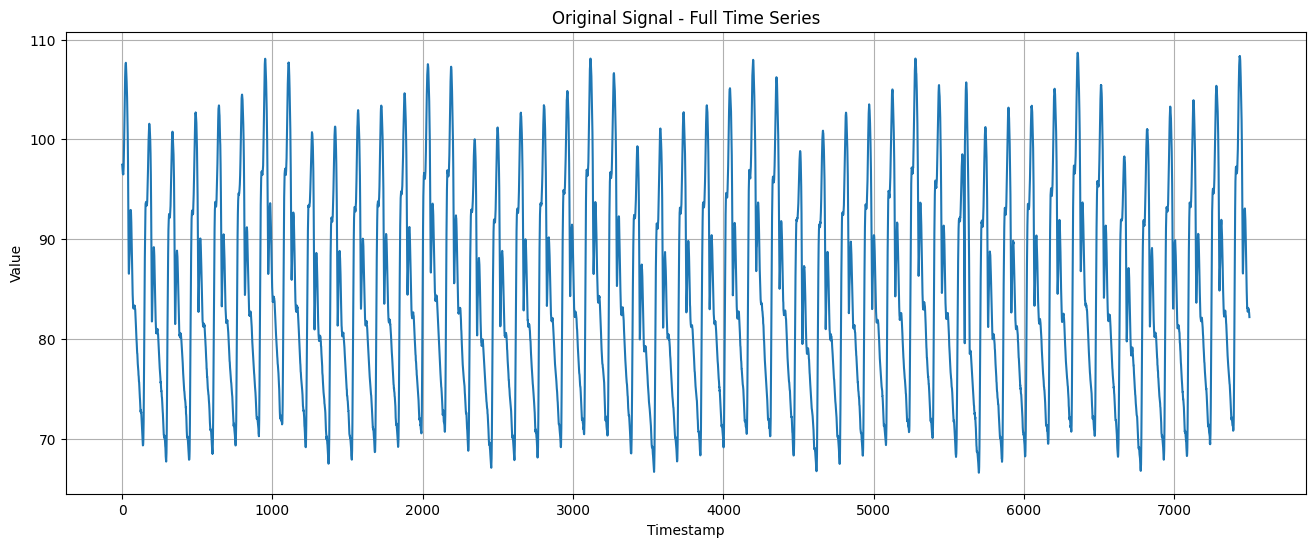

In [ ]:
# Plot the original time series signal
plt.figure(figsize=(16, 6))
plt.plot(df['timestamp'], df['value'])
plt.title("Original Signal - Full Time Series")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.grid()
plt.show()
